<a href="https://colab.research.google.com/github/WilliamMejiaG/Redesigning_infographics/blob/main/Data_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redesign a graphic with python
The goal of this work is to create more effective visualizations from current data bases available publicly. The chosen data set was "Focus on what you eat, not whether your food is local".

# Current infographic

In [249]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [445]:
import cv2 
import numpy as np
image = cv2.imread('/content/drive/MyDrive/CODING_DOJO/WEEK_03/Environmental-impact-of-food-by-life-cycle-stage.png')

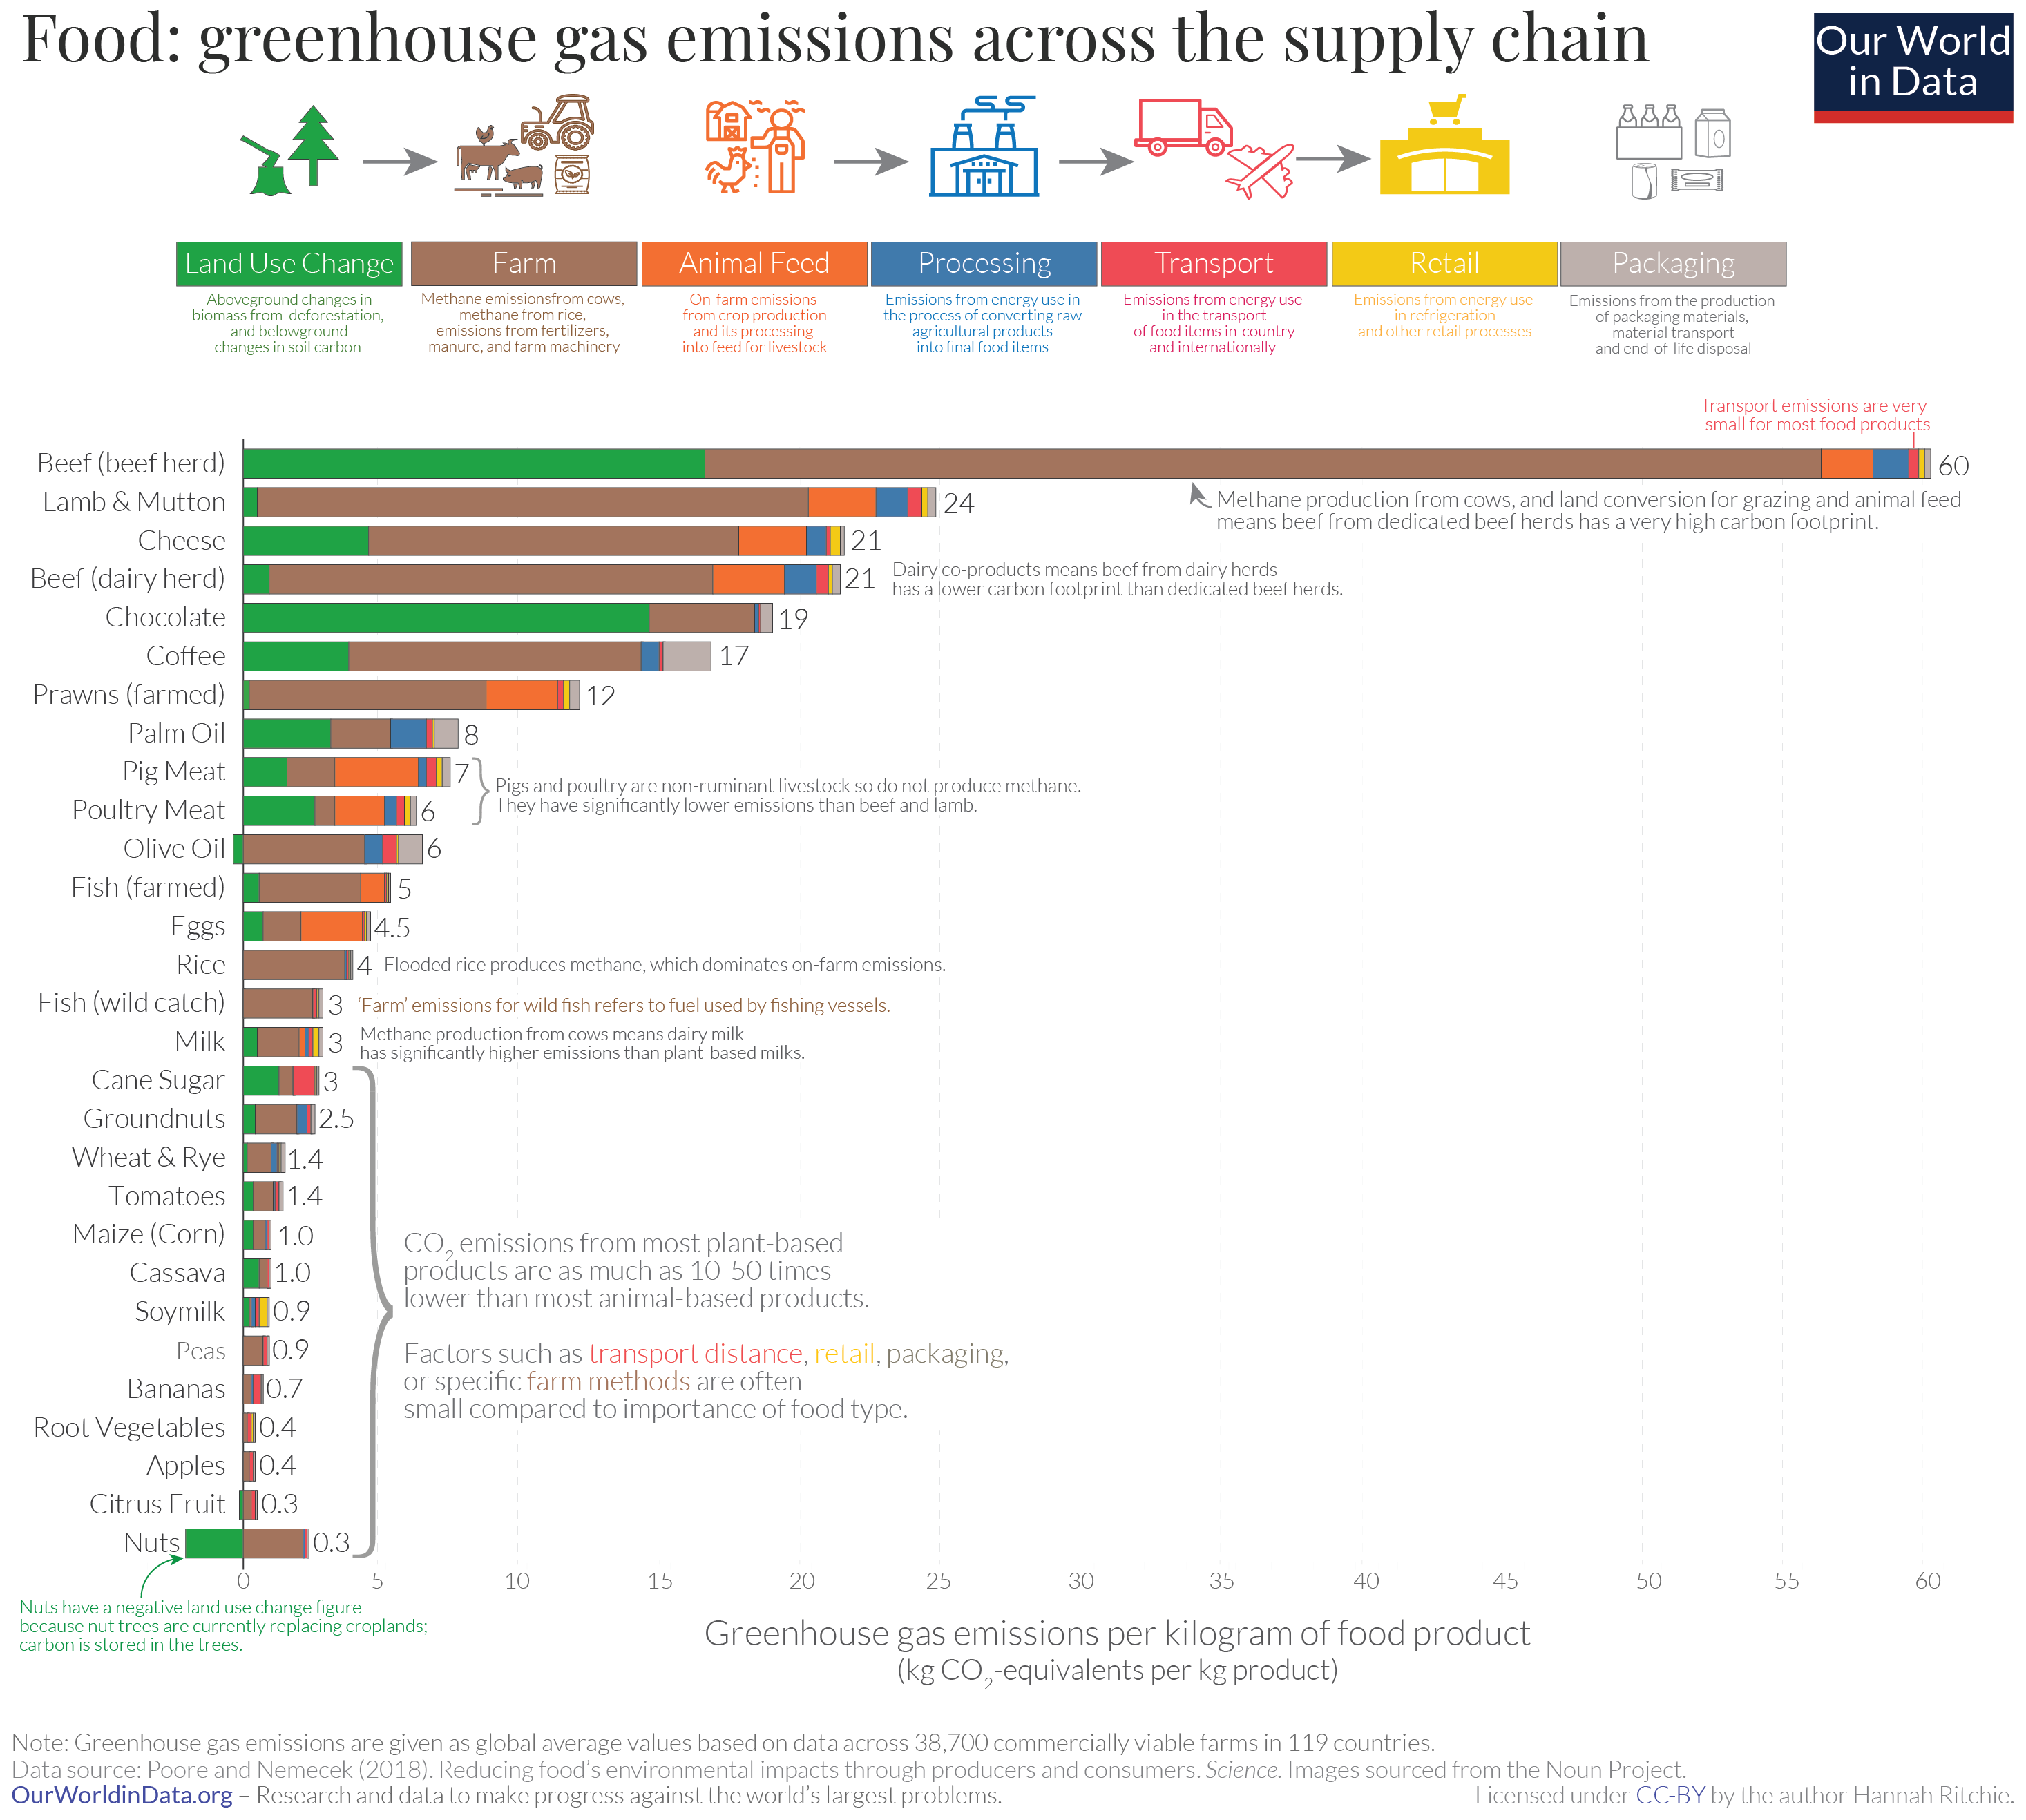

In [449]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

# **Data base screening**

In [382]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/CODING_DOJO/WEEK_03/GHG-emissions-by-life-cycle-stage-OurWorldinData-upload.csv')
df.tail()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Unnamed: 8
38,Milk,0.5,0.2,1.5,0.1,0.1,0.1,0.3,NaN
39,Cheese,4.5,2.3,13.1,0.7,0.1,0.2,0.3,NaN
40,Eggs,0.7,2.2,1.3,0.0,0.1,0.2,0.0,NaN
41,Fish (farmed),0.5,0.8,3.6,0.0,0.1,0.1,0.0,NaN
42,Shrimps (farmed),0.2,2.5,8.4,0.0,0.2,0.3,0.2,NaN


**Data screening**

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Food product     43 non-null     object 
 1   Land use change  43 non-null     float64
 2   Animal Feed      43 non-null     float64
 3   Farm             43 non-null     float64
 4   Processing       43 non-null     float64
 5   Transport        43 non-null     float64
 6   Packging         43 non-null     float64
 7   Retail           43 non-null     float64
 8   Unnamed: 8       0 non-null      float64
dtypes: float64(8), object(1)
memory usage: 3.1+ KB


In [384]:
df.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Unnamed: 8'],
      dtype='object')

In [385]:
# Elimination of Unnamed: 8 column
df.drop(columns=['Unnamed: 8'], inplace= True)


In [386]:
df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1


# **First approach**
The different food items will be reclassified into a broader categories. From each of these, it will be analyzed the GHG emissions in the supply chain using a heat map.


In [387]:
# Introducing the new categories
eneral_food_classification = ['Cereals','Cereals','Cereals','Cereals','Cereals','Tubers, grasses, pulses and derived products','Tubers, grasses, pulses and derived products',
                               'Tubers, grasses, pulses and derived products','Tubers, grasses, pulses and derived products',
                               'Tubers, grasses, pulses and derived products','Tubers, grasses, pulses and derived products','Nuts, seeds and derived products',
                               'Nuts, seeds and derived products','Tubers, grasses, pulses and derived products','Tubers, grasses, pulses and derived products',
                               'Oils and fats','Oils and fats','Oils and fats','Oils and fats','Oils and fats',
                               'Veggies','Veggies','Veggies','Veggies','Veggies',
                               'Fruits and derived products','Fruits and derived products','Fruits and derived products','Fruits and derived products',
                               'Fruits and derived products','Fruits and derived products','Nuts, seeds and derived products','Nuts, seeds and derived products',
                               'Meats and derived products','Meats and derived products','Meats and derived products',
                               'Meats and derived products','Meats and derived products','Milk and dairy products','Milk and dairy products',
                               'Meats and derived products','Seafood','Seafood']
                

In [388]:
general_food_classification

['Cereals',
 'Cereals',
 'Cereals',
 'Cereals',
 'Cereals',
 'Tubers, grasses, pulses and derived products',
 'Tubers, grasses, pulses and derived products',
 'Tubers, grasses, pulses and derived products',
 'Tubers, grasses, pulses and derived products',
 'Tubers, grasses, pulses and derived products',
 'Tubers, grasses, pulses and derived products',
 'Nuts, seeds and derived products',
 'Nuts, seeds and derived products',
 'Tubers, grasses, pulses and derived products',
 'Tubers, grasses, pulses and derived products',
 'Oils and fats',
 'Oils and fats',
 'Oils and fats',
 'Oils and fats',
 'Oils and fats',
 'Veggies',
 'Veggies',
 'Veggies',
 'Veggies',
 'Veggies',
 'Fruits and derived products',
 'Fruits and derived products',
 'Fruits and derived products',
 'Fruits and derived products',
 'Fruits and derived products',
 'Fruits and derived products',
 'Nuts, seeds and derived products',
 'Nuts, seeds and derived products',
 'Meats and derived products',
 'Meats and derived product

In [389]:
# Introducing the new categories as a column
df.insert(1,'General_food_classification',general_food_classification)
df.head()

,Food product,General_food_classification,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail
0,Wheat & Rye (Bread),Cereals,0.1,0.0,0.8,0.2,0.1,0.1,0.1
1,Maize (Meal),Cereals,0.3,0.0,0.5,0.1,0.1,0.1,0.0
2,Barley (Beer),Cereals,0.0,0.0,0.2,0.1,0.0,0.5,0.3
3,Oatmeal,Cereals,0.0,0.0,1.4,0.0,0.1,0.1,0.0
4,Rice,Cereals,0.0,0.0,3.6,0.1,0.1,0.1,0.1


In [299]:
# Getting the mean by categories and then converting the values into percentages by row
df.groupby(['General_food_classification'])['Land use change','Animal Feed','Farm','Processing','Transport','Packging','Retail'].mean().apply(lambda x: x/x.sum(), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail
General_food_classification,,,,,,,
Cereals,0.043478,0.000000,0.706522,0.054348,0.043478,0.097826,0.054348
Fruits and derived products,-0.021739,0.000000,0.543478,0.043478,0.217391,0.217391,0.000000
Meats and derived products,0.182114,0.111382,0.636585,0.034146,0.015447,0.012195,0.008130
Milk and dairy products,0.208333,0.104167,0.608333,0.033333,0.008333,0.012500,0.025000
"Nuts, seeds and derived products",0.431217,0.000000,0.465608,0.031746,0.010582,0.058201,0.002646
Oils and fats,0.227612,0.000000,0.458955,0.100746,0.052239,0.160448,0.000000
Seafood,0.041420,0.195266,0.710059,0.000000,0.017751,0.023669,0.011834
"Tubers, grasses, pulses and derived products",0.258621,0.000000,0.327586,0.103448,0.181034,0.077586,0.051724
Veggies,0.137931,0.000000,0.551724,0.034483,0.241379,0.034483,0.000000


In [348]:
df1 = df.groupby(['General_food_classification'])['Land use change','Animal Feed','Farm','Processing','Transport','Packging','Retail'].mean().apply(lambda x: x/x.sum(), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


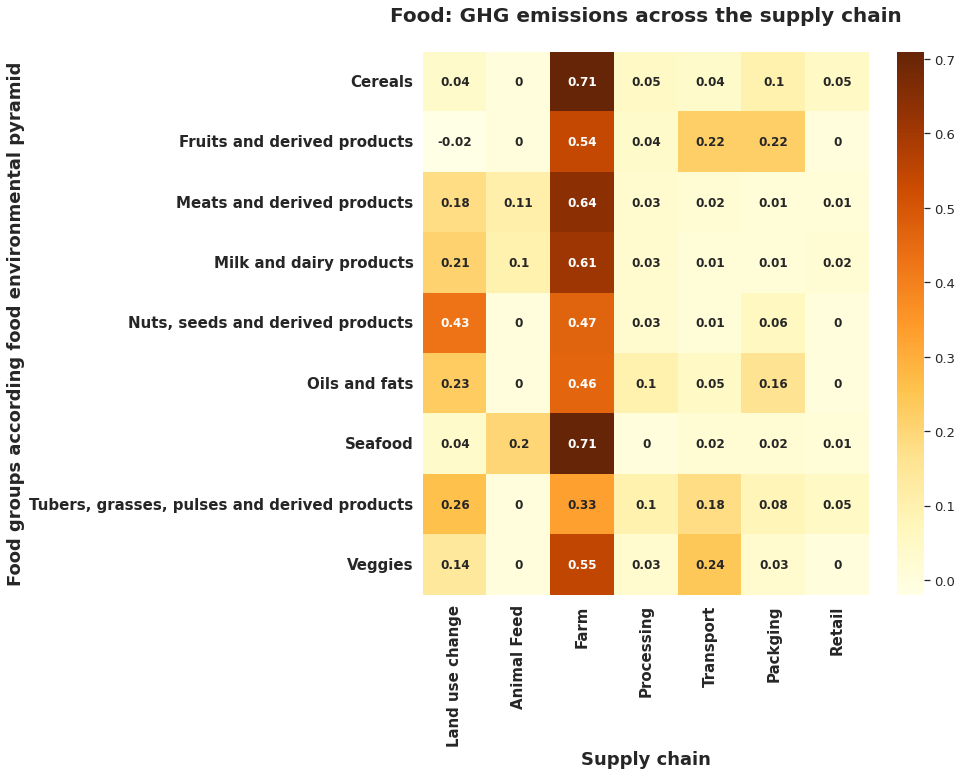

In [420]:
# Heat map creation
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
ax = sns.heatmap(df1.round(2), cmap = 'YlOrBr',annot=True, annot_kws={'size': '12', 'fontweight':'bold'}) 
ax.set_title('Food: GHG emissions across the supply chain', fontsize = 20, pad=30, fontweight= 'bold')
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 15, fontweight= 'bold')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 15, fontweight= 'bold')
ax.set_xlabel('Supply chain', fontsize = 18, fontweight= 'bold')
ax.set_ylabel('Food groups according food environmental pyramid', fontsize = 18, fontweight= 'bold')
plt.show()



# **Second approach**
It will take each row and will be put into the heat map to see the amount of GHG emissions across the supply chain.

In [390]:
df.drop(columns=['General_food_classification'], inplace = True)


,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1


In [415]:
df[['Land use change','Animal Feed','Farm','Processing','Transport','Packging','Retail']].apply(lambda x: x/abs(x).sum(), axis=1).set_index(df['Food product'].values)

,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail
Wheat & Rye (Bread),0.071429,0.000000,0.571429,0.142857,0.071429,0.071429,0.071429
Maize (Meal),0.272727,0.000000,0.454545,0.090909,0.090909,0.090909,0.000000
Barley (Beer),0.000000,0.000000,0.181818,0.090909,0.000000,0.454545,0.272727
Oatmeal,0.000000,0.000000,0.875000,0.000000,0.062500,0.062500,0.000000
Rice,0.000000,0.000000,0.900000,0.025000,0.025000,0.025000,0.025000
Potatoes,0.000000,0.000000,0.666667,0.000000,0.333333,0.000000,0.000000
Cassava,0.666667,0.000000,0.222222,0.000000,0.111111,0.000000,0.000000
Cane Sugar,0.461538,0.000000,0.192308,0.000000,0.307692,0.038462,0.000000
Beet Sugar,0.000000,0.000000,0.357143,0.142857,0.428571,0.071429,0.000000
Other Pulses,0.000000,0.000000,0.687500,0.000000,0.062500,0.250000,0.000000


In [413]:
df2 = df[['Land use change','Animal Feed','Farm','Processing','Transport','Packging','Retail']].apply(lambda x: x/abs(x).sum(), axis=1).set_index(df['Food product'].values)

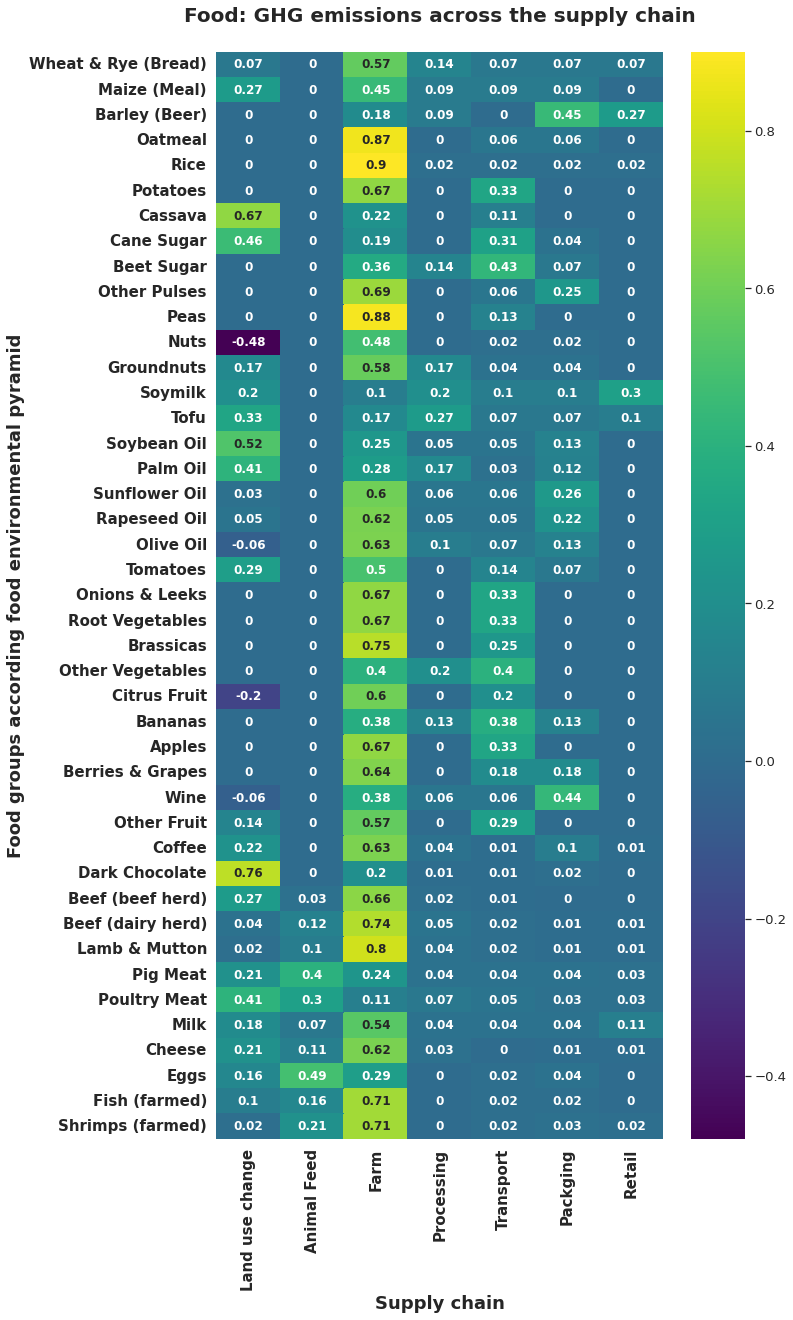

In [417]:
# Heat map creation
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,20))
ax = sns.heatmap(df2.round(2), cmap = 'viridis',annot=True, annot_kws={'size': '12', 'fontweight':'bold'}) 
ax.set_title('Food: GHG emissions across the supply chain', fontsize = 20, pad=30, fontweight= 'bold')
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 15, fontweight= 'bold')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 15, fontweight= 'bold')
ax.set_xlabel('Supply chain', fontsize = 18, fontweight= 'bold')
ax.set_ylabel('Food groups according food environmental pyramid', fontsize = 18, fontweight= 'bold')
plt.show()